<a href="https://colab.research.google.com/github/sohampalande/Sequential_Models_Deeplearn/blob/master/Sequential_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Required Libraries
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler



**Preprocessing the Data**

In [0]:
train_labels=[]
train_samples=[]

In [0]:
#Create Artificial Data

for i in range(50):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)
  
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)
  
for i in range(1000):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)
  
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)
  
  

In [0]:
#Processing the Data
#Keras requires the labels to be a numpy array and the samples to be a numpy array or a list of numpy arrays

train_labels=np.array(train_labels)
train_samples=np.array(train_samples)


In [0]:
#Scale the Data so the Neural Network Can learn/perform better 
#Perform feature scaling using scikitlearn's scaler class MinMaxScaler

#instantiate a scaler variable 
scaler=MinMaxScaler(feature_range=(0,1))
#scale the samples using the scaler 
scaled_train_samples=scaler.fit_transform((train_samples).reshape(-1,1))


**Building the Model**


In [0]:
#Create model
#the sequential model is a linear stack of layers (of the neural network)
#each element of the array is a layer of the network/ can also be done using model.add()
model=Sequential([
    Dense(16, input_shape=(1,), activation='relu'),  #input layer
    Dense(32, activation='relu'),                    #hidden layer
    Dense(2, activation='softmax')                   #output layer  2 units because our data is labeled with two labels so the output can be any one of these
])


In [0]:
model.summary()

In [41]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])  
"""the parameter 'Adam' is the optimization function for the cost/loss function that you want to use ex: gradient descent, stochastic gradient descent...
the loss function being used is the sparse_categorical_crossentropy (other example: mean squared error cost function) and the learning rate is 0.0001"""
#metrics evaluates the performance of the model based on accuracy

    

"the parameter 'Adam' is the optimization function for the cost/loss function that you want to use ex: gradient descent, stochastic gradient descent...\nthe loss function being used is the sparse_categorical_crossentropy (other example: mean squared error cost function) and the learning rate is 0.0001"

In [0]:
#after compiling, we train the model on the preprocessed data
#batch size: instead of looking at each sample one by one the model analyses the samples in batches
#EPOCH is the run thorugh the data -> the number of training runs through the data
#shuffle : the data that the model will iterate over in each training run(EPOCH) will be in a different order default is true
#ex : during gradient descent the model might converge to values of weights that are not the most optimum(so shuffling can address this).
#verbose=how much output for each run of the model training 
#vallidation_split the function will split 0.1 or 10% of the data as the validation set for every traning run (epoch)
model.fit(scaled_train_samples, train_labels,validation_split=0.1, batch_size=10, epochs=20, shuffle='true', verbose=2)

In [0]:
#Creating a Validation Set
#Don't train on validation set, use it only to "validate" the model on unseen data
#The model will predict on the validation set during each traning run (epoch). We will see the loss and accuracy for the validation set as well
#prevents overfitting 




**Making** **Predictions**


In [0]:
#To make predictions, we need test data/test set. (We have a training set and a cross-validation set )
test_samples=[]
test_labels=[]

#Create artfical test data
for i in range(50):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)
  
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)
  
for i in range(1000):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)
  
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)
  

In [0]:
#Convert label data and sample data into numpy arrays
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)


In [0]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_test_samples=scaler.fit_transform((test_samples).reshape(-1,1))



In [0]:
#Predict
#use the predict function to make the predictions
#model is the variable model that refers to the model we trained in the above steps
predictions=model.predict(scaled_test_samples, batch_size=10, verbose=0)



In [0]:
#the predictions are the probabilities of the data being a 0 or 1 - hence each row adds up to one.
#we can round the predictions
for i in predictions:
  print(i)
  

In [0]:
#the model rounds the predictions and gives the prediction as a class (0,1)
rounded_predictions=model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [0]:
for i in rounded_predictions:
  print(i)

**Evaluating the Predictions Against Our Labels Using a Confusion Matrix** 

In [0]:
#allows us to plot within the notebook
%matplotlib inline     
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
#a confusion matrix allows you to evaluate the performance of a classification model when the true values of the test data are known

In [0]:
cm=confusion_matrix(test_labels, rounded_predictions)
#plot function from sklern website
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
      cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
      print("Normalized confusion Matrix")
    else :
      print("Confusion Matrix, without Normalization")
      
      print(cm)
      thresh=cm.max()/2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j]),
        horizontalalignment="center"
        color="white" if cm[i,j]> thresh else "black"
            
      plt.tight_layout()
      plt.ylabel('True Label')
      plt.xlabel('Predicted Label')
      
      
    


Confusion Matrix, without Normalization
[[ 943  107]
 [  46 1004]]


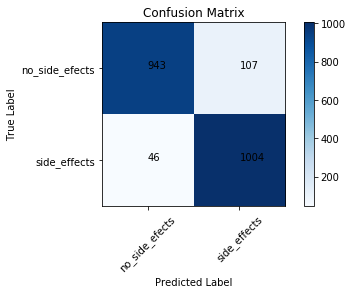

In [92]:
cm_plot_labels=['no_side_efects','side_effects']
plot_confusion_matrix(cm,cm_plot_labels, title='Confusion Matrix')


**Save and Load Keras Model**

In [0]:
#model.save
model.save('medical_trial.h5') 
#use a .h5 file extension for the file location 
#if no path is passed then the model is saved to the current directory
#preserves: the architecture of the model, the weights of the model, the cost function, optimizer function and learning rate, and 
#state of the optimizer which allows it to begin traning where it left off

In [0]:
#load new model
from keras.models import load_model
new_model=load_model('medical_trial.h5')


In [99]:
new_model.summary()   #the model is the same as the original model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
